# Customer Churn ML Project
by Ann Okafor - Springboard Capstone

### Introduction:
In today's highly competitive business landscape, customer retention has become a pivotal concern for companies aiming to sustain growth and success. The ability to predict when customers might discontinue their engagement, commonly referred to as churn, holds immense value. In this machine learning project, we delve into the Telco Customer Churn dataset, which provides us with a comprehensive glimpse into customer behaviors, demographics, and account information. Our objective is to harness the power of machine learning to develop predictive models that can identify potential churners. By analyzing the various attributes associated with customers, such as their services usage, contract information, payment methods, and demographics, we aim to gain insights that will enable us to create focused customer retention strategies.

The Telco Customer Churn dataset offers a rich array of customer-related attributes, encapsulating both the characteristics of those who have recently churned and those who have remained. The dataset contains valuable information, including details about the services customers have signed up for, account history, and demographic factors. Notably, the dataset features a column named 'Churn' that marks whether a customer has left within the last month. By leveraging this dataset, we have the opportunity to construct predictive models that can help businesses anticipate churn and develop tailored retention initiatives.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, recall_score, precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from scipy.stats import uniform, randint

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import Data
df = pd.read_csv(r'dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Exploratory Data Analysis (EDA)
In this section, we delve into the initial steps of understanding and exploring the dataset. The dataset consists of customer information, and each record is characterized by various features. Here's a brief overview of the key features in the dataset:

- customerID - unique value identifying customer
- gender - whether the customer is a male or a female
- SeniorCitizen - whether the customer is a senior citizen or not (1, 0)
- Partner - whether the customer has a partner or not (Yes, No)
- Dependents - whether the customer has dependents or not (Yes, No). A dependent is a person who relies on another as a primary source of income,
- tenure - number of months the customer has stayed with the company
- PhoneService - whether the customer has a phone service or not (Yes, No)
- MultipleLines - whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService - customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup - whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection - whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport - whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV - whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies - whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract - type of contract according to duration (Month-to-month, One year, Two year)
- PaperlessBilling - bills issued in paperless form (Yes, No)
- PaymentMethod - payment method used by customer (Electronic check, Mailed check, Credit card (automatic), Bank transfer (automatic))
- MonthlyCharges - amount of charge for service on monthly bases
- TotalCharges - cumulative charges for service during subscription (tenure) period 
- Churn - whether the customer churned or not (Yes or No)

The dataset has a total of 7043 records and 21 columns. The target variable, Churn, indicates whether a customer has churned (No) or not (Yes).

Before proceeding with further analysis and model building, we conducted basic data exploration:

- Checked for missing values: Fortunately, there are no missing values in any of the columns.
- Descriptive statistics: Examined basic statistical measures like mean, median, minimum, and maximum values for numerical features such as SeniorCitizen, tenure, and MonthlyCharges.

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [8]:
# Missing Values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Data Cleaning
In this phase of the project, we focused on preparing the dataset for analysis and modeling by addressing issues such as missing values, data type inconsistencies, and formatting inconsistencies.

#### Handling Missing Values in 'TotalCharges'
Initially, we noticed that the 'TotalCharges' column contained some values that were whitespace strings. This prevented us from directly converting the column to a numeric data type. To address this issue, we followed the following steps:

1. Replacing Whitespace with Null Values: We replaced the whitespace strings in the 'TotalCharges' column with null values using the np.nan function.

2. Converting to Float: We successfully converted the 'TotalCharges' column to a float data type after replacing the whitespace values with null.

3. Filling Null Values: We decided to use the column's median value to fill in the null values in the 'TotalCharges' column, ensuring that it remained a meaningful representation of the data.

In [9]:
# Changing the whitespaces to null values using np.nan
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'] = np.nan

# Converting the column to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Using the column's median to fill the null values
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [10]:
# Check Total Charges datatype
df['TotalCharges'].dtype

dtype('float64')

#### Formatting 'PaymentMethod' Values
The 'PaymentMethod' column contained values with the suffix "(automatic)" and parentheses. To create a more consistent and readable format, we followed these steps:

- Removing Suffixes and Parentheses: We used string manipulation techniques to remove the suffix "(automatic)" as well as any parentheses in the 'PaymentMethod' values.

In [11]:
# Payment Method value count
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [12]:
# Remove the string (automatic) from the Payment Method column
df['PaymentMethod'] = df['PaymentMethod'].str.replace('(automatic)', '').str.replace('(', '').str.replace(')', '')

#### Removing Unnecessary 'customerID' Column
- The 'customerID' column was a unique identifier and did not contribute to the predictive modeling process. Therefore, we removed this column from the dataset to streamline our analysis and modeling efforts.

In [13]:
# Drop the customer ID column
df.drop('customerID', axis=1, inplace=True)

#### Resulting Dataset
After addressing these data cleaning tasks, we were left with a cleaned and formatted dataset ready for further exploration, feature engineering, and model building.

In [14]:
# View the dataset
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Numerical Variables Analysis: 

- How are the distributions of tenure, monthly charges, and total charges among our customer base? 
- How are the numerical variables (tenure, monthly charges, and total charges) correlated with each other? 

In [15]:
# List of numerical columns
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

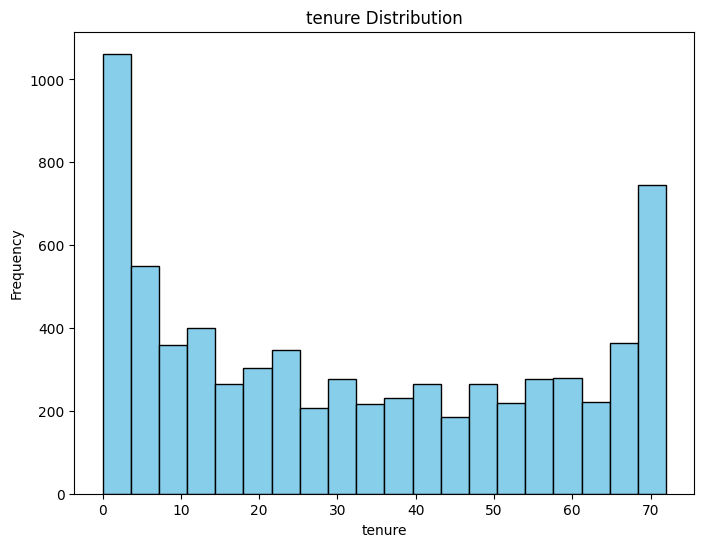

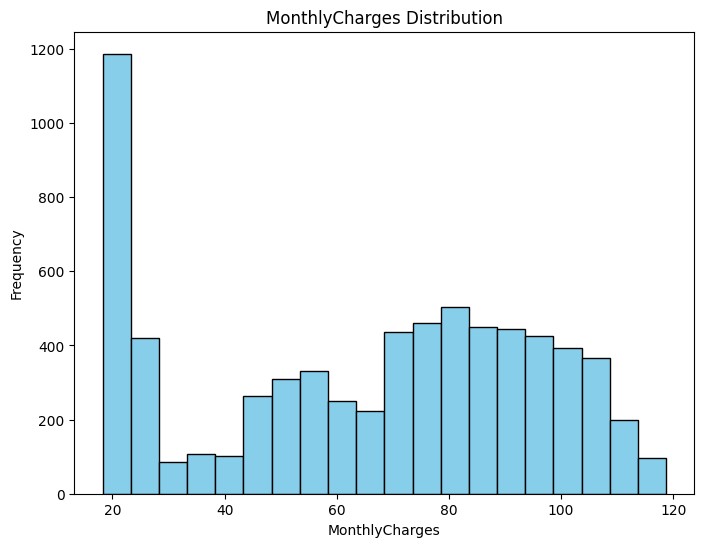

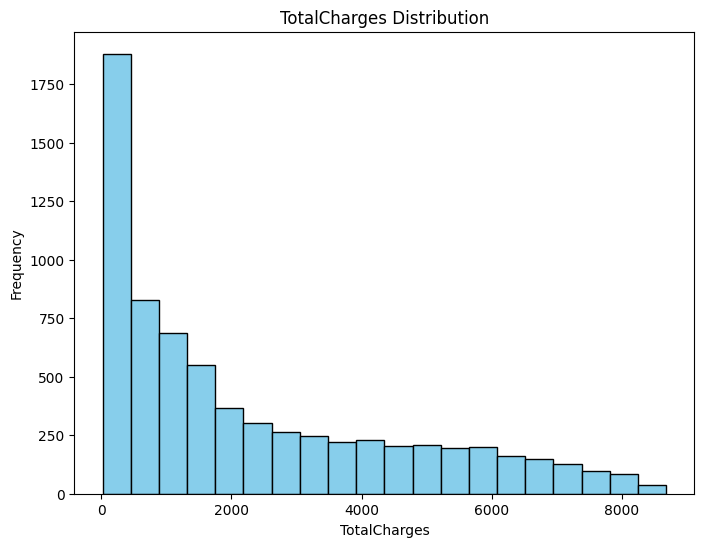

In [16]:
# Histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    df[column].plot(kind='hist', bins=20, edgecolor='black', color='skyblue')
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [17]:
# Correlation matrix calculation
correlation_matrix = df[numerical_columns].corr()

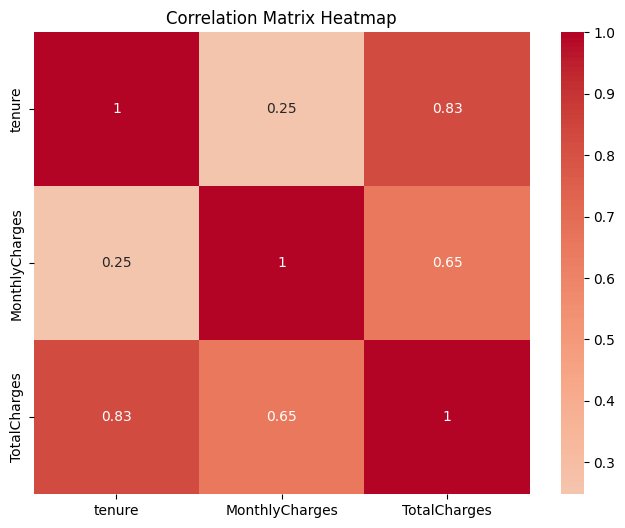

In [18]:
# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Monthly Charges vs. Total Charges Analysis:
- How does the relationship between monthly charges and total charges vary among our customer base? 
- Are there any discernible trends in how customers' monthly charges relate to their total charges?

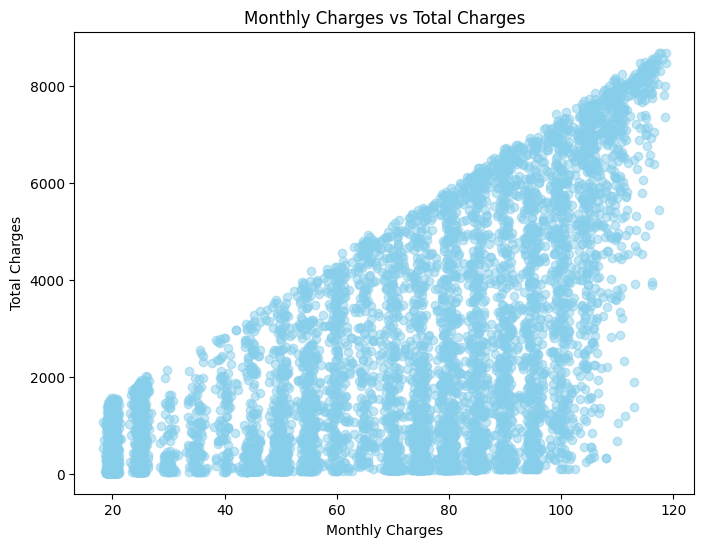

In [19]:
# Create a scatter plot to visualize MonthlyCharges vs TotalCharges
plt.figure(figsize=(8, 6))
plt.scatter(df['MonthlyCharges'], df['TotalCharges'], color='skyblue', alpha=0.5)
plt.title('Monthly Charges vs Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

#### Categorical Variables Analysis:
- How is the distribution of customers based on gender in our dataset? 
- Business Question 2: What proportion of our customer base consists of senior citizens? 
- Business Question 3: Are customers who have partners more likely to stay with our service compared to those without partners? 
- Business Question 4: What is the prevalence of customers with dependents in our dataset?

In [20]:
# List of categorical columns
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

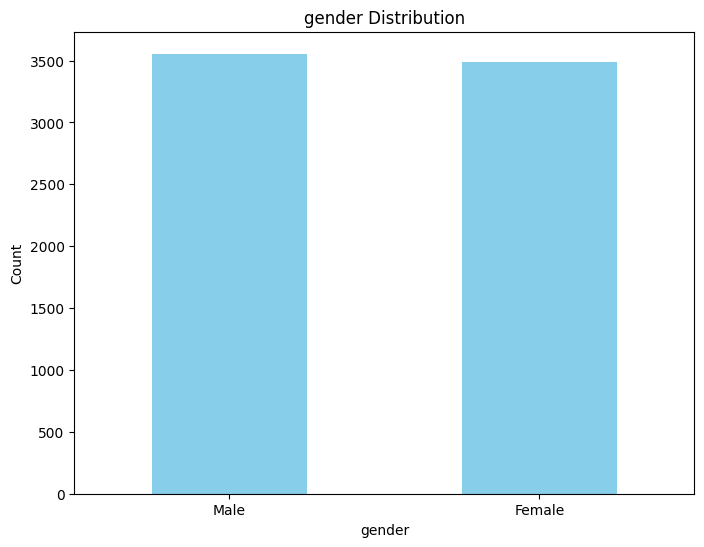

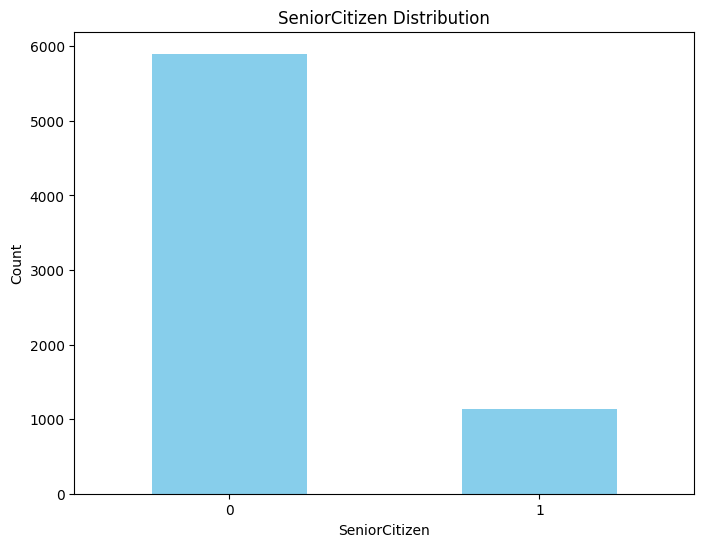

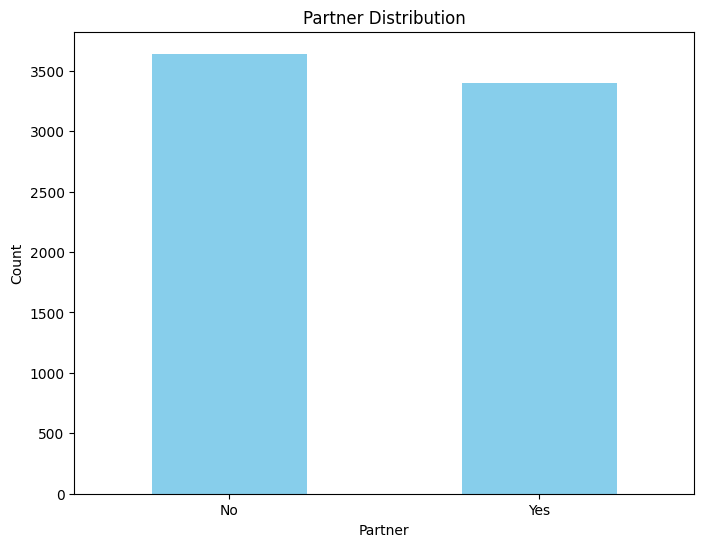

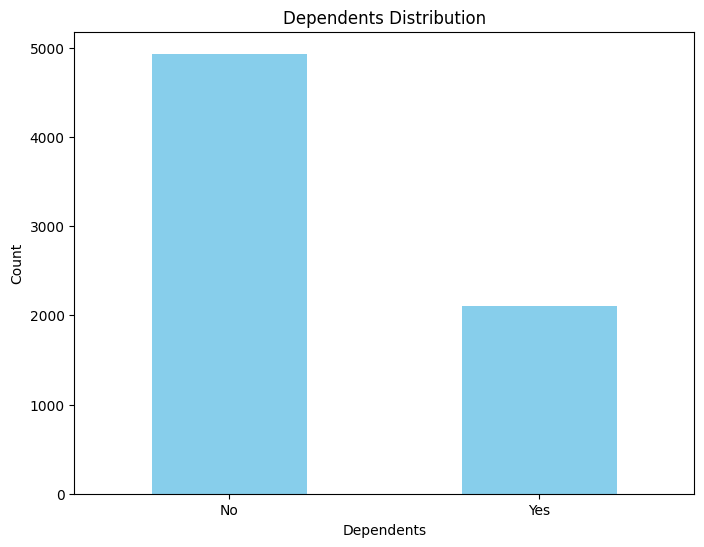

In [21]:
# Bar charts for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

#### Churn Distribution Analysis:
- How does churn vary across different demographic categories?
- How imbalanced is the churn distribution among our customer base?

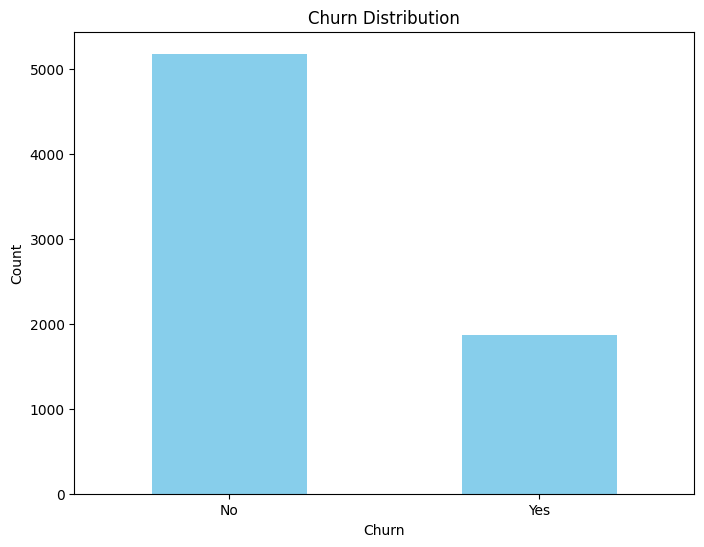

In [22]:
# Bar chart for Churn distribution
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['skyblue'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

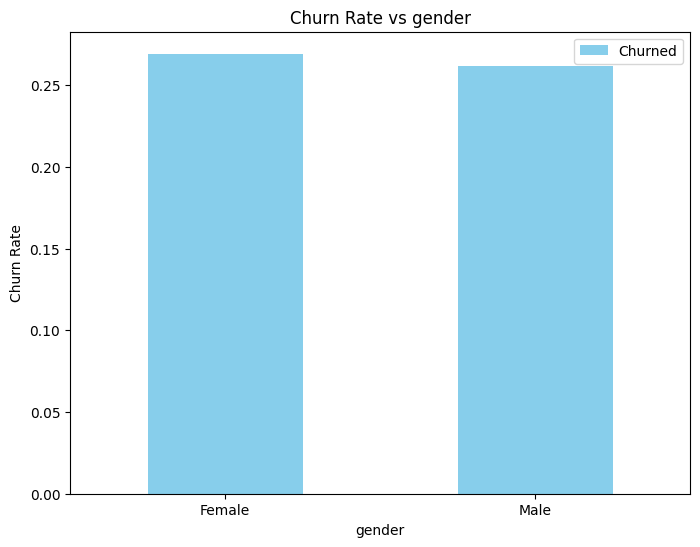

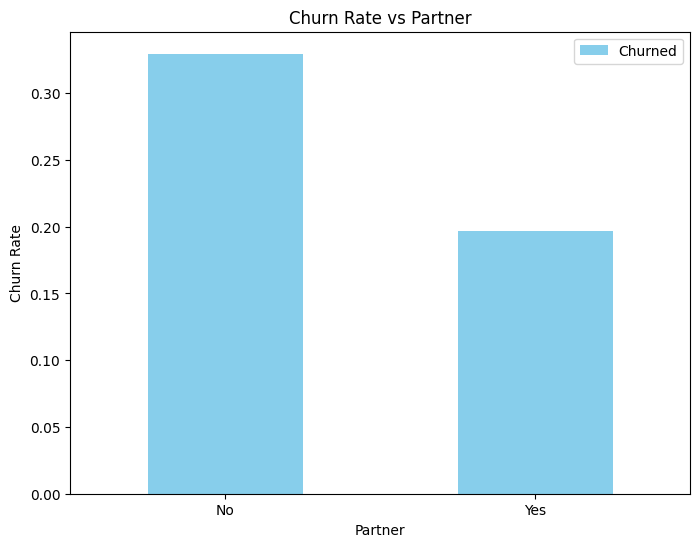

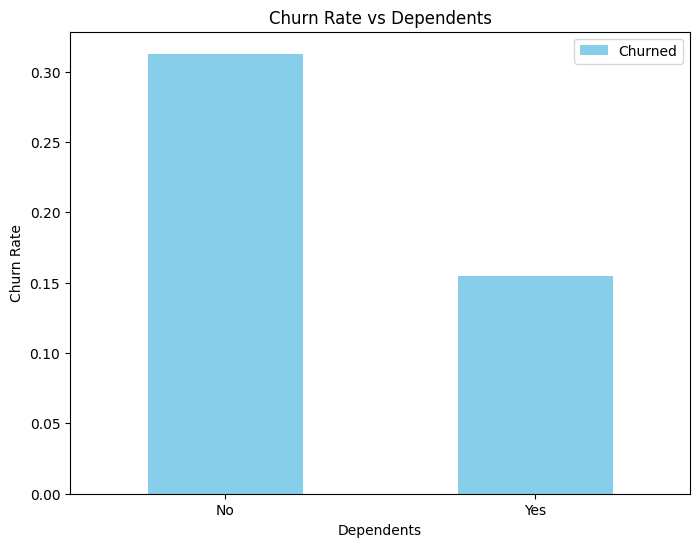

In [23]:
# List of demographic columns for analysis
demographic_columns = ['gender', 'Partner', 'Dependents']

# Calculate churn rates for each demographic category
demographic_churn_rates = {}
for column in demographic_columns:
    demographic_churn_rates[column] = df.groupby(column)['Churn'].value_counts(normalize=True).unstack()['Yes']

# Compare churn rates for demographic categories
for column, rates in demographic_churn_rates.items():
    plt.figure(figsize=(8, 6))
    rates.plot(kind='bar', color=['skyblue'])
    plt.title(f'Churn Rate vs {column}')
    plt.xlabel(column)
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=0)
    plt.legend(['Churned', 'Not Churned'])
    plt.show()

#### Churn vs. Other Features Analysis:
- How does the type of contract impact churn rates? Are customers on shorter-term contracts more likely to churn compared to those on longer-term contracts??
- How does the choice of payment method relate to churn rates? 
- How do different internet service options influence churn rates?
- What is the correlation between streaming TV service and churn rates? 

In [24]:
# List of categorical columns for comparison with Churn
categorical_columns = ['Contract', 'PaymentMethod', 'InternetService', 'StreamingTV']

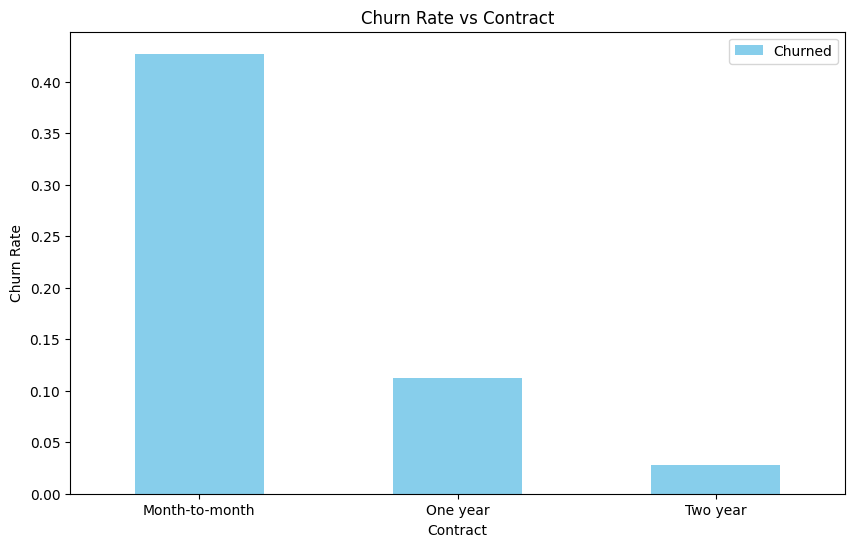

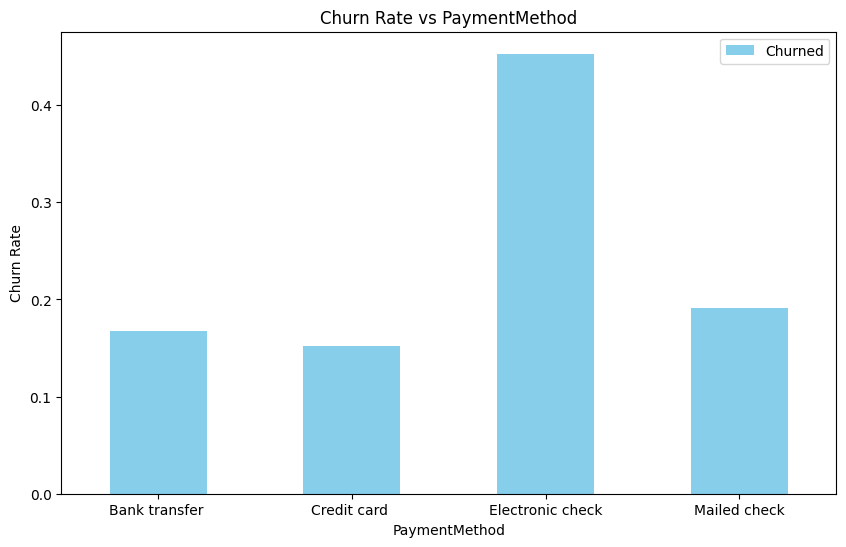

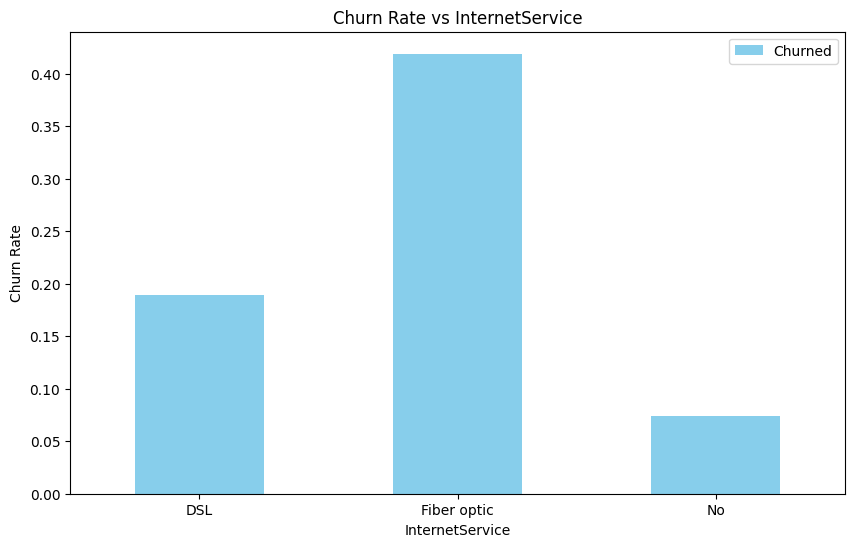

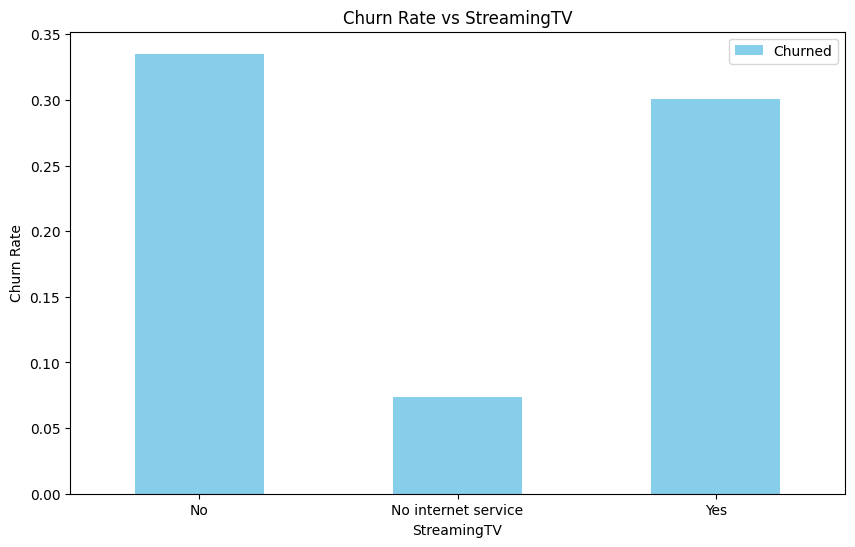

In [25]:
# Calculate churn rates for each category
churn_rates = {}
for column in categorical_columns:
    churn_rates[column] = df.groupby(column)['Churn'].value_counts(normalize=True).unstack()['Yes']

# Compare churn rates across different categorical variables
for column, rates in churn_rates.items():
    plt.figure(figsize=(10, 6))
    rates.plot(kind='bar', color=['skyblue'])
    plt.title(f'Churn Rate vs {column}')
    plt.xlabel(column)
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=0)
    plt.legend(['Churned', 'Not Churned'])
    plt.show()

#### Tenure Analysis:
- How does customer tenure impact churn rates? Are customers who have been with us for a longer period less likely to churn?
- How does the churn rate evolve over time for different customer segments? 

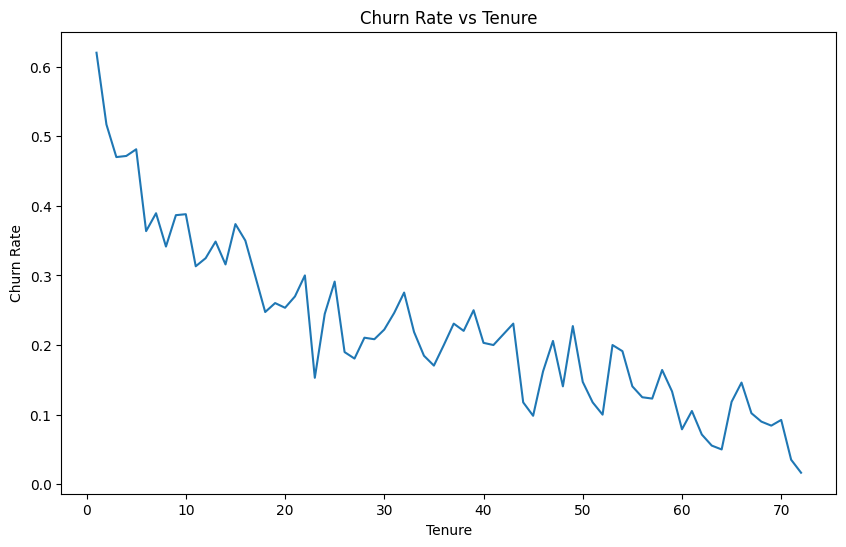

In [26]:
# Calculate churn rates for each tenure
tenure_churn_rates = df.groupby('tenure')['Churn'].value_counts(normalize=True).unstack()['Yes']

# Create a line plot to show churn rates with increasing tenure
plt.figure(figsize=(10, 6))
tenure_churn_rates.plot()
plt.title('Churn Rate vs Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.show()

#### Service Subscriptions Analysis:

- How does the subscription to phone services relate to churn rates? 
- How do churn rates vary among customers based on their choice of internet service? 
- How does the subscription to streaming TV services impact churn rates? 

<Figure size 800x600 with 0 Axes>

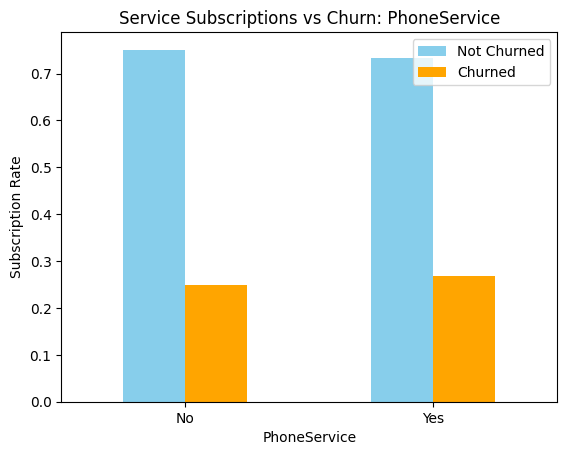

<Figure size 800x600 with 0 Axes>

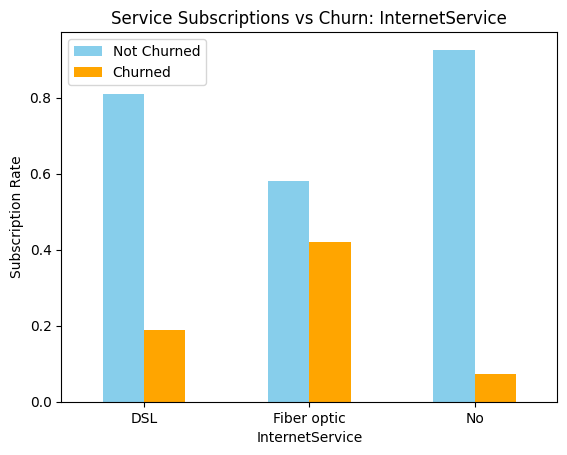

<Figure size 800x600 with 0 Axes>

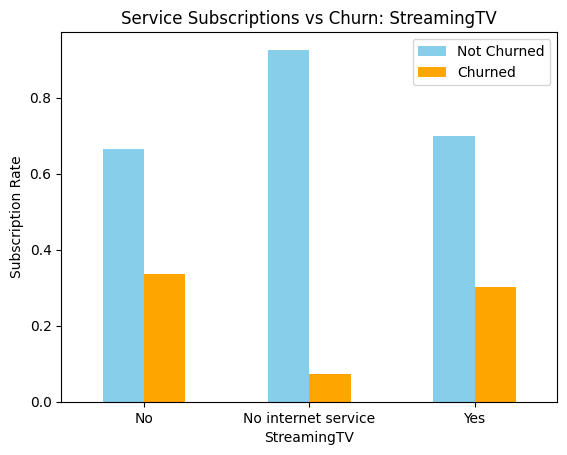

In [27]:
# List of service columns for analysis
service_columns = ['PhoneService', 'InternetService', 'StreamingTV']

# Calculate service subscription rates for churned and non-churned customers
service_subscriptions = {}
for column in service_columns:
    service_subscriptions[column] = df.groupby(column)['Churn'].value_counts(normalize=True).unstack()

# Create bar plots to visualize service subscriptions by churn status
for column, subscriptions in service_subscriptions.items():
    plt.figure(figsize=(8, 6))
    subscriptions.plot(kind='bar', color=['skyblue', 'orange'])
    plt.title(f'Service Subscriptions vs Churn: {column}')
    plt.xlabel(column)
    plt.ylabel('Subscription Rate')
    plt.xticks(rotation=0)
    plt.legend(['Not Churned', 'Churned'])
    plt.show()

#### Senior Citizens Analysis:
- Do senior citizens exhibit different churn behavior compared to non-senior citizens? 

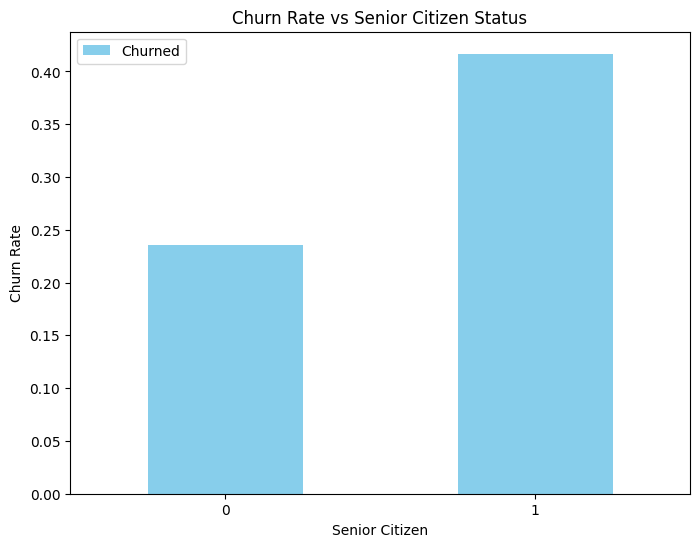

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming it's stored in a variable called 'df')
# Replace this with the actual variable name where your dataset is stored
# df = pd.read_csv('telco_customer_churn.csv')

# Calculate churn rates for senior citizens and non-senior citizens
senior_churn_rates = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()['Yes']

# Create a bar plot to visualize churn rates for senior citizens and non-senior citizens
plt.figure(figsize=(8, 6))
senior_churn_rates.plot(kind='bar', color=['skyblue'])
plt.title('Churn Rate vs Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.legend(['Churned', 'Not Churned'])
plt.show()


#### Contract Length Analysis:
- How do churn rates vary based on contract length? 
- Are there specific contract lengths associated with higher churn rates? 

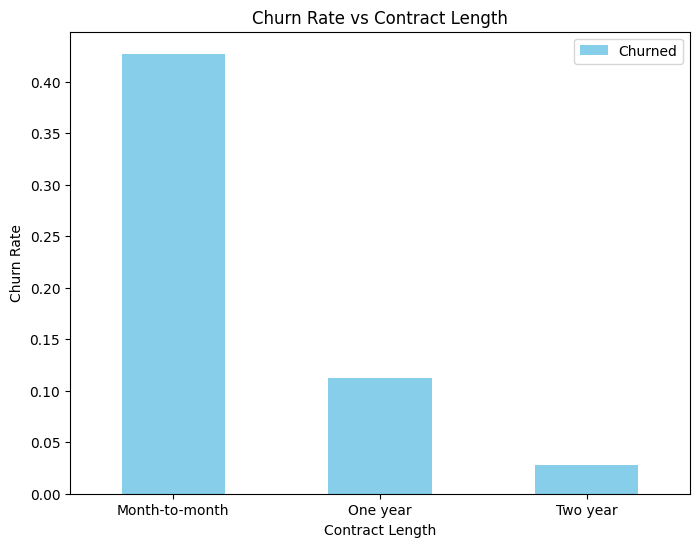

In [29]:
# Calculate churn rates based on contract length
contract_churn_rates = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()['Yes']

# Create a bar plot to visualize churn rates for different contract lengths
plt.figure(figsize=(8, 6))
contract_churn_rates.plot(kind='bar', color=['skyblue'])
plt.title('Churn Rate vs Contract Length')
plt.xlabel('Contract Length')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.legend(['Churned', 'Not Churned'])
plt.show()

#### Billing and Payment Analysis:
- How do different combinations of paperless billing and payment methods impact churn rates? 
- Are there specific billing and payment options that correlate with lower churn rates?

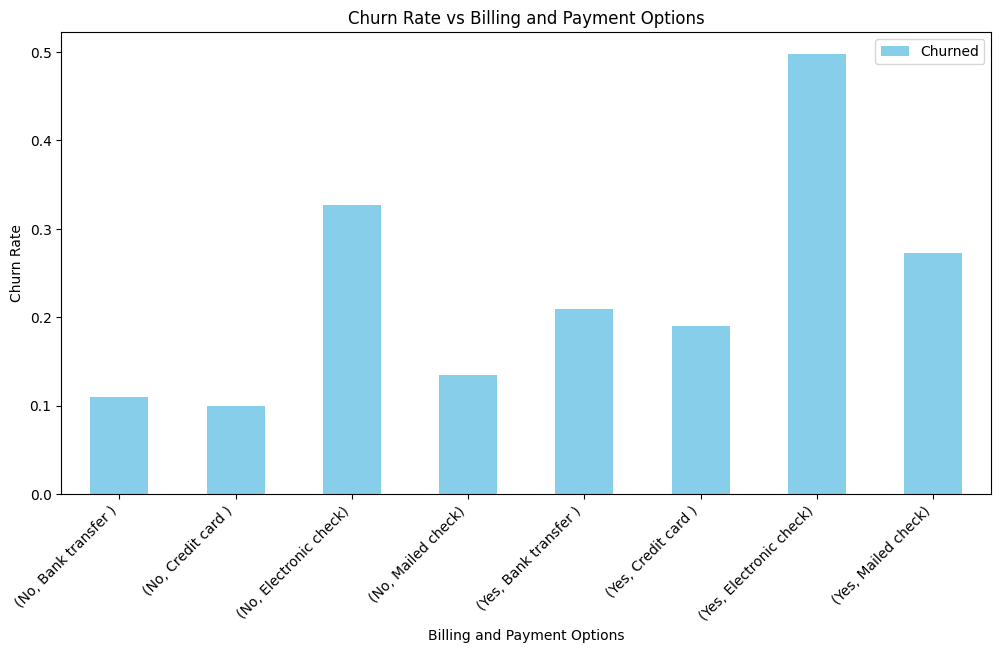

In [30]:
# Calculate churn rates based on paperless billing and payment method
billing_churn_rates = df.groupby(['PaperlessBilling', 'PaymentMethod'])['Churn'].value_counts(normalize=True).unstack()['Yes']

# Create a bar plot to visualize churn rates for different billing and payment options
plt.figure(figsize=(12, 6))
billing_churn_rates.plot(kind='bar', color=['skyblue'])
plt.title('Churn Rate vs Billing and Payment Options')
plt.xlabel('Billing and Payment Options')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right')
plt.legend(['Churned', 'Not Churned'])
plt.show()

#### Is the dataset balanced?

<AxesSubplot: >

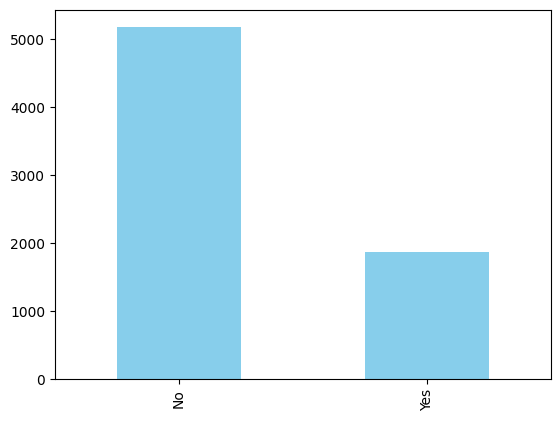

In [31]:
# Check if dataset is balanced
df['Churn'].value_counts()

# Plot the target variable
df['Churn'].value_counts().plot(kind='bar', color=['skyblue'])

### Feature Engineering

In [32]:
# Creating the lists
binary = []
categorical = []

# Iterate through columns to categorize as binary or categorical
for col in df.columns:
    unique_count = len(df[col].unique())
    if unique_count == 2 and col != 'Churn':
        binary.append(col)
    elif 2 < unique_count < 5:
        categorical.append(col)

# Combine binary and categorical lists
bin_cat = binary + categorical

In [33]:
target_col = 'Churn'

# Apply label encoding to binary variables and the target variable
label_encoder = LabelEncoder()
for col in binary + [target_col]:
    if col == target_col:
        df[col] = label_encoder.fit_transform(df[col])
    else:
        le = LabelEncoder().fit(df[col])
        df[col] = le.transform(df[col])

# Use one-hot encoding for other categorical variables
df = pd.get_dummies(df, columns=categorical)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [34]:
# Split the dataset into features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use RandomUnderSampler to balance the training dataset
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

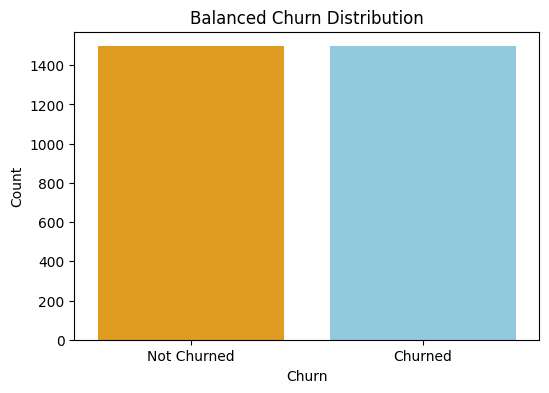

In [35]:
# Define a custom color palette
colors = ['orange', 'skyblue']

# Create a countplot with the custom color palette
plt.figure(figsize=(6, 4))
sns.countplot(x=y_rus, palette=colors)
plt.title('Balanced Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

In [36]:
# Standardize the dataset
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_rus = scaler.transform(X_rus)

### Model Metrics

- The most important metric we'll use is Recall. This metric indicates the proportion of positive results yielded by the model by the total number of positive labels in the dataset. In this case, the Recall reveals the proportion of churns identified correctly by the total number of churns. Recall is a useful metric for our model because it is important to identify as many churns as possible. If we fail to identify a churn, we will lose a customer and the associated revenue. Therefore, we want to minimize the number of false negatives, which is why we will focus on Recall as our primary metric.
- Precision is the proportion of churns identified correctly by the positive predictions. We want to identify as many churns as possible, so we will want to maximize the number of churns identified correctly. Therefore, we will focus on Precision as our secondary metric.

### Model Selection

In [37]:
# Training the models
logreg_balanced = cross_validate(LogisticRegression(), X_rus, y_rus, cv=5, scoring=['recall', 'precision'])
logreg_unbalanced = cross_validate(LogisticRegression(), X_train, y_train, cv=5, scoring=['recall', 'precision'])

trees_balanced = cross_validate(DecisionTreeClassifier(), X_rus, y_rus, cv=5, scoring=['recall', 'precision'])
trees_unbalanced = cross_validate(DecisionTreeClassifier(), X_train, y_train, cv=5, scoring=['recall', 'precision'])

forest_balanced = cross_validate(RandomForestClassifier(), X_rus, y_rus, cv=5, scoring=['recall', 'precision'])
forest_unbalanced = cross_validate(RandomForestClassifier(), X_train, y_train, cv=5, scoring=['recall', 'precision'])

svm_balanced = cross_validate(SVC(), X_rus, y_rus, cv=5, scoring=['recall', 'precision'])
svm_unbalanced = cross_validate(SVC(),  X_train, y_train, cv=5, scoring=['recall', 'precision'])

xgb_balanced = cross_validate(XGBClassifier(), X_rus, y_rus, cv=5, scoring=['recall', 'precision'])
xgb_unbalanced = cross_validate(XGBClassifier(), X_train, y_train, cv=5, scoring=['recall', 'precision'])

In [38]:
# Storing the results in a DataFrame
summary = pd.DataFrame({
            'labels': ['recall', 'precision'],
            'logreg_balanced': [logreg_balanced['test_recall'].mean(), logreg_balanced['test_precision'].mean()],
            'logreg_unbalanced': [logreg_unbalanced['test_recall'].mean(), logreg_unbalanced['test_precision'].mean()],
            'trees_balanced': [trees_balanced['test_recall'].mean(), trees_balanced['test_precision'].mean()],
            'trees_unbalanced': [trees_unbalanced['test_recall'].mean(), trees_unbalanced['test_precision'].mean()],
            'forest_balanced': [forest_balanced['test_recall'].mean(), forest_balanced['test_precision'].mean()],
            'forest_unbalanced': [forest_unbalanced['test_recall'].mean(), forest_unbalanced['test_precision'].mean()],
            'svm_balanced': [svm_balanced['test_recall'].mean(), svm_balanced['test_precision'].mean()],
            'svm_unbalanced': [svm_unbalanced['test_recall'].mean(), svm_unbalanced['test_precision'].mean()],
            'xgb_balanced': [xgb_balanced['test_recall'].mean(), xgb_balanced['test_precision'].mean()],
            'xgb_unbalanced': [xgb_unbalanced['test_recall'].mean(), xgb_unbalanced['test_precision'].mean()]           
}
).set_index('labels')
summary.index.name=None
     
summary.style.applymap(lambda x: 'background-color: lightgreen' if x >= 0.7 else '')

,logreg_balanced,logreg_unbalanced,trees_balanced,trees_unbalanced,forest_balanced,forest_unbalanced,svm_balanced,svm_unbalanced,xgb_balanced,xgb_unbalanced
recall,0.799467,0.542776,0.688524,0.506011,0.746667,0.470582,0.789423,0.485949,0.748011,0.506002
precision,0.742466,0.654169,0.692882,0.485586,0.747650,0.625021,0.731859,0.658133,0.717598,0.613105


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

### Model Tuning

In [40]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)

# Create Logistic Regression classifier
log_reg = LogisticRegression()

# Define the parameter distribution to sample from
param_dist = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'C': uniform(0.001, 100)
}

# Create RandomizedSearchCV with the parameter distribution and desired scoring metric
random_search = RandomizedSearchCV(log_reg, param_distributions=param_dist, n_iter=10, scoring='recall', cv=kfold, refit=True)

# Fit the RandomizedSearchCV on the balanced dataset
random_search.fit(X_rus, y_rus)

# Get the best hyperparameters and their associated scores
best_recall_score = random_search.best_score_
best_params = random_search.best_params_

print(f'Best recall: {best_recall_score} for {best_params}')

Best recall: 0.7974738015607581 for {'C': 35.50780856791041, 'solver': 'newton-cg'}


In [41]:
# Create Random Forest classifier
random_forest = RandomForestClassifier()

# Define the parameter distribution to sample from
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 15),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

# Create RandomizedSearchCV with the parameter distribution and desired scoring metric
random_search = RandomizedSearchCV(random_forest, param_distributions=param_dist, n_iter=10, scoring='recall', cv=kfold, refit=True)

# Fit the RandomizedSearchCV on the balanced dataset
random_search.fit(X_rus, y_rus)

# Get the best hyperparameters and their associated scores
best_recall_score = random_search.best_score_
best_params = random_search.best_params_

print(f'Best recall: {best_recall_score} for {best_params}')

Best recall: 0.8168205128205128 for {'bootstrap': False, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 357}


In [42]:
# Create SVM classifier
svm_classifier = SVC()

# Define the parameter distribution to sample from
param_dist = {
    'C': uniform(0.01, 10),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(randint(1, 100).rvs(size=10) / 100)
}

# Create RandomizedSearchCV with the parameter distribution and desired scoring metric
random_search = RandomizedSearchCV(svm_classifier, param_distributions=param_dist, n_iter=10, scoring='recall', cv=kfold, refit=True)

# Fit the RandomizedSearchCV on the balanced dataset
random_search.fit(X_rus, y_rus)

# Get the best hyperparameters and their associated scores
best_recall_score = random_search.best_score_
best_params = random_search.best_params_

print(f'Best recall: {best_recall_score} for {best_params}')

Best recall: 0.7881047937569677 for {'C': 1.5860729374795968, 'gamma': 'auto', 'kernel': 'poly'}


In [43]:
# Create XGBoost classifier
xgb_classifier = XGBClassifier()

# Define the parameter distribution to sample from
param_dist = {
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'n_estimators': randint(100, 1000),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

# Create RandomizedSearchCV with the parameter distribution and desired scoring metric
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist, n_iter=10, scoring='recall', cv=kfold, refit=True)

# Fit the RandomizedSearchCV on the balanced dataset
random_search.fit(X_rus, y_rus)

# Get the best hyperparameters and their associated scores
best_recall_score = random_search.best_score_
best_params = random_search.best_params_

print(f'Best recall: {best_recall_score} for {best_params}')

Best recall: 0.749335562987737 for {'colsample_bytree': 0.7392464695215153, 'learning_rate': 0.08459230121271442, 'max_depth': 9, 'n_estimators': 579, 'subsample': 0.9594161275334394}


### Model Evaluation

In [44]:
# Define the best hyperparameters
best_params = {'bootstrap': True, 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 438}

# Initialize the Random Forest model with the best hyperparameters
rf_classifier = RandomForestClassifier(**best_params)

# Fit the model on the balanced dataset
rf_classifier.fit(X_rus, y_rus)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Create a classification report
classification_rep = classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned'])

print("Classification Report for Random Forest Model:")
print(classification_rep)

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

 Not Churned       0.93      0.71      0.81      1036
     Churned       0.52      0.85      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.75      0.76      1409



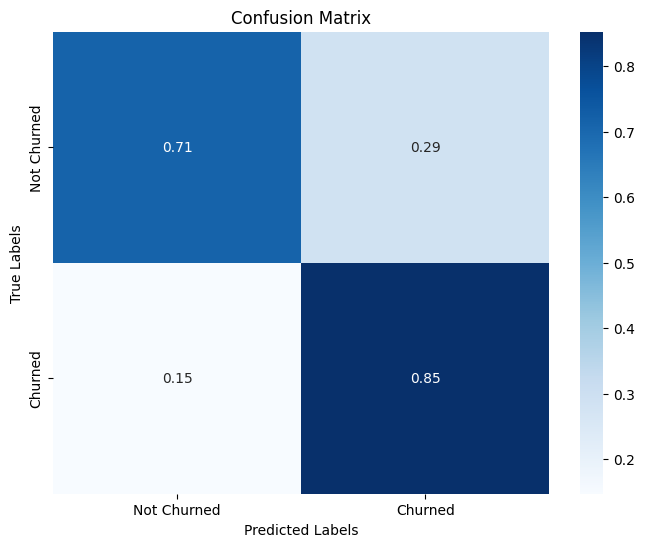

In [45]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the confusion matrix with normalized values
conf_matrix_ratio = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Visualize the confusion matrix with ratios using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ratio, annot=True, cmap='Blues', fmt='.2f', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [46]:
# Define the best parameters
best_params = {'C': 4.940011222705826, 'gamma': 0.05, 'kernel': 'linear'}

# Initialize and train the SVM model with the best parameters
best_svm_model = SVC(**best_params)
best_svm_model.fit(X_rus, y_rus)

# Make predictions on the test set
y_pred = best_svm_model.predict(X_test)

# Calculate the classification report
classification_rep = classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned'])
print("Classification Report for SVM Model:\n", classification_rep)

Classification Report for SVM Model:
               precision    recall  f1-score   support

 Not Churned       0.93      0.65      0.77      1036
     Churned       0.47      0.86      0.61       373

    accuracy                           0.71      1409
   macro avg       0.70      0.76      0.69      1409
weighted avg       0.81      0.71      0.72      1409



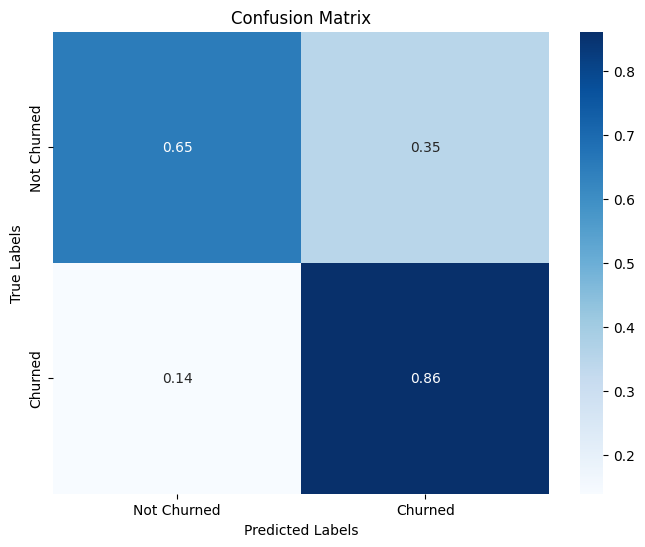

In [47]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the confusion matrix with normalized values
conf_matrix_ratio = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Visualize the confusion matrix with ratios using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ratio, annot=True, cmap='Blues', fmt='.2f', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [48]:
# Save the model
import pickle
pickle.dump(best_svm_model, open('model.pkl', 'wb'))

### Conclusion

Minimizing False Negatives: A higher recall means that the model is better at correctly identifying customers who are likely to churn (positive class). Minimizing false negatives is crucial because it helps the business identify and intervene with customers who are at risk of leaving. Missing out on these customers could lead to revenue loss and decreased customer satisfaction.

Retention Strategies: Identifying potential churners allows the business to implement targeted retention strategies for those customers. By reaching out to customers who are likely to churn, the business can offer personalized incentives, discounts, or improved services to encourage them to stay.

Customer Experience: Predicting churn and taking proactive measures to retain customers can enhance their experience with the business. Customers who receive timely offers or assistance when they consider leaving are more likely to feel valued and remain loyal.

Cost Savings: Acquiring new customers is often more expensive than retaining existing ones. By focusing on reducing churn through a higher recall, businesses can save resources that would otherwise be spent on acquiring new customers to replace those who have left.

Data-Driven Decision Making: A focus on recall encourages businesses to take a more proactive approach to churn management. It encourages data-driven decision-making and a deeper understanding of customer behavior, which can lead to improvements in products, services, and customer satisfaction.